<a href="https://colab.research.google.com/github/swathi22003343/Neural-Network-Regression-Model/blob/main/deep_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset1 = pd.read_csv('deep.csv')
X = dataset1[['input']].values
y = dataset1[['output']].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [6]:
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.history = {'loss': []}
        self.linear1 = nn.Linear(1, 12)
        self.linear2 = nn.Linear(12, 10)
        self.linear3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()

  def forward(self,x):
    x = self.relu(self.linear1(x))
    x = self.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [7]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

In [8]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(ai_brain(X_train), y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [9]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 15588.569336
Epoch [200/2000], Loss: 13821.917969
Epoch [400/2000], Loss: 10305.997070
Epoch [600/2000], Loss: 6143.120605
Epoch [800/2000], Loss: 3097.947021
Epoch [1000/2000], Loss: 2098.271240
Epoch [1200/2000], Loss: 1675.151733
Epoch [1400/2000], Loss: 1185.558838
Epoch [1600/2000], Loss: 724.152893
Epoch [1800/2000], Loss: 344.434235


In [10]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 105.420387


In [11]:
loss_df = pd.DataFrame(ai_brain.history)


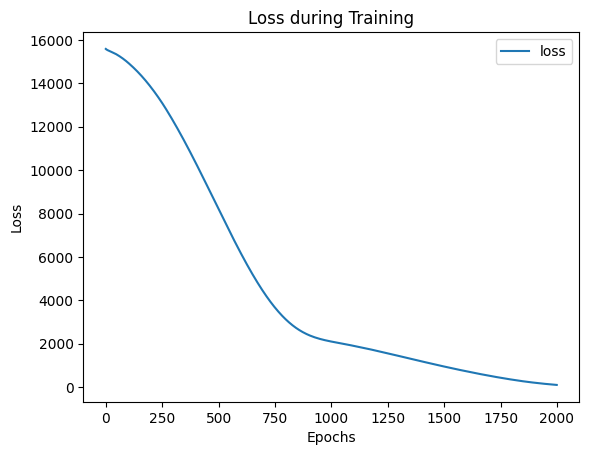

In [12]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [13]:

X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction1 = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction1: {prediction1}')

Prediction1: 96.81502532958984


In [14]:

X_n1_1 = torch.tensor([[5]], dtype=torch.float32)
prediction2 = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction2: {prediction2}')

Prediction2: 62.2908935546875
